### 🧹 ML Data Preprocessing

Data preprocessing is a key step in building effective machine learning models. It involves preparing and transforming raw data into a clean and structured format. The main stages include:

- **Data Integration**: Combining data from multiple sources (e.g., CSV files, databases, APIs) into a unified dataset for analysis.

- **Data Cleaning**: Handling missing values, correcting inconsistencies, removing duplicates, and filtering out noise or outliers.

- **Data Transformation**:
  - **Encoding**: Converting categorical data into numerical format using Label Encoding or One-Hot Encoding.
  - **Scaling**: Normalizing or standardizing features using techniques like Min-Max Scaling or Standardization.
  - **Feature Engineering**: Creating new meaningful features or modifying existing ones to improve model performance.

- **Data Reduction**: Reducing the number of features or records (e.g., via PCA or feature selection) while retaining important information.

- **Data Splitting**: Dividing the dataset into training, validation, and test sets for model development and evaluation.

> ✅ Proper preprocessing ensures better model performance, faster convergence, and more reliable results.


### 🌳 Tree-like vs Non Tree-like Algorithms & Preprocessing Needs

In machine learning, algorithms differ in how they handle data — particularly in how much preprocessing they require. Here's a quick overview:

#### ✅ Tree-like Algorithms
These include:
- Decision Trees
- Random Forests
- Gradient Boosting (e.g., XGBoost, LightGBM, CatBoost)

**Advantages**:
- Handle both numerical and categorical data directly
- Not sensitive to feature scaling or normalization
- Can manage missing values (depending on implementation)

**Minimal preprocessing needed**:
- Encode categories if required (e.g., Label Encoding)
- Handle extreme outliers only if they dominate the data

---

#### ⚙️ Non Tree-like Algorithms
These include:
- Linear/Logistic Regression
- K-Nearest Neighbors (KNN)
- Support Vector Machines (SVM)
- Neural Networks
- PCA, KMeans, etc.

**Require extensive preprocessing**:
- **Feature Scaling** (StandardScaler, MinMaxScaler)
- **Encoding** categorical variables (One-Hot Encoding)
- **Handling Missing Values**
- **Dimensionality Reduction** if needed
- **Outlier Detection** for sensitive models (like KNN, SVM)

---

### 📝 Summary

| Algorithm Type     | Needs Scaling | Handles Categorical | Handles Missing Values |
|--------------------|---------------|----------------------|-------------------------|
| Tree-like          | ❌ No          | ✅ Yes (some)         | ✅ Often                |
| Non Tree-like      | ✅ Yes         | ❌ No (needs encoding)| ❌ No                   |

> 🧠 Choose preprocessing steps based on the algorithm's nature. Tree-based models are more flexible, while others need carefully prepared data.


### 📊 Continuous Scale Data vs Categorical Data

In machine learning, understanding the type of data is essential for choosing the right preprocessing techniques and algorithms. The two primary types are:

---

#### 🔢 Continuous Scale Data
Also known as **numerical** or **quantitative** data.

- Represents **measurable quantities**
- Values can be **ordered**, **added**, **averaged**, etc.
- Examples:
  - Age, Salary, Height, Temperature, Distance
- Usually requires:
  - **Feature scaling** (e.g., Standardization, Normalization)
  - **Outlier detection**
  - Sometimes **binning** or **discretization** for tree models

---

#### 🏷️ Categorical Data
Also known as **qualitative** or **label** data.

- Represents **categories or groups**
- Values have no mathematical meaning or ordering (unless ordinal)
- Types:
  - **Nominal**: No order (e.g., Gender, Color, City)
  - **Ordinal**: Implies order (e.g., Low, Medium, High)
- Usually requires:
  - **Encoding** (e.g., Label Encoding, One-Hot Encoding)
  - **Imputation** for missing values
  - Consideration of **cardinality** (too many unique categories can cause issues)

---

### 📝 Summary Table

| Type              | Examples            | Operations Allowed         | Preprocessing Needed             |
|-------------------|---------------------|-----------------------------|----------------------------------|
| Continuous        | Age, Price, Score   | Arithmetic, Comparison      | Scaling, Outlier Handling        |
| Categorical       | Color, City, Brand  | Grouping, Counting          | Encoding, Missing Value Handling |

> 🔍 Correctly identifying and treating data types is critical to building effective ML models.


### Checking for missing data


In [110]:
import seaborn as sns

In [111]:
df=sns.load_dataset('titanic')
nan_deck=df['deck'].value_counts()  ##count the number of nans in the deck column
print(nan_deck)

deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64


In [112]:
print(df.head().isnull())

   survived  pclass    sex    age  sibsp  parch   fare  embarked  class  \
0     False   False  False  False  False  False  False     False  False   
1     False   False  False  False  False  False  False     False  False   
2     False   False  False  False  False  False  False     False  False   
3     False   False  False  False  False  False  False     False  False   
4     False   False  False  False  False  False  False     False  False   

     who  adult_male   deck  embark_town  alive  alone  
0  False       False   True        False  False  False  
1  False       False  False        False  False  False  
2  False       False   True        False  False  False  
3  False       False  False        False  False  False  
4  False       False   True        False  False  False  


In [113]:
print(df.head().notnull())

   survived  pclass   sex   age  sibsp  parch  fare  embarked  class   who  \
0      True    True  True  True   True   True  True      True   True  True   
1      True    True  True  True   True   True  True      True   True  True   
2      True    True  True  True   True   True  True      True   True  True   
3      True    True  True  True   True   True  True      True   True  True   
4      True    True  True  True   True   True  True      True   True  True   

   adult_male   deck  embark_town  alive  alone  
0        True  False         True   True   True  
1        True   True         True   True   True  
2        True  False         True   True   True  
3        True   True         True   True   True  
4        True  False         True   True   True  


##✅ TL;DR:
axis=0 → operate down the rows → affects rows

axis=1 → operate across the columns → affects columns

In [114]:
#calculating the number of missing data using the isnull() method
print(df.head().isnull().sum(axis=0))

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           3
embark_town    0
alive          0
alone          0
dtype: int64


In [115]:
df_tresh=df.dropna(axis=1,thresh=500)
df_tresh  ##deck column is eliminated

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [116]:
df_tresh.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

In [117]:
df_age=df.dropna(subset=['age'],how='any',axis=0)
print(len(df_age))

714


In [118]:
len(df)

891

### Replacing missing values

In [119]:
mean_age=df['age'].mean(axis=0)
df['age'].fillna(mean_age,inplace=True)

print(f'mean : {mean_age}')
print()
print(df['age'].head(10))

mean : 29.69911764705882

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: age, dtype: float64


C:\Users\bened\AppData\Local\Temp\ipykernel_7824\1916238344.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(mean_age,inplace=True)


## replacing NaN with most frequent city in embark_town

In [120]:
df=sns.load_dataset('titanic')
print(df['embark_town'][825:830])
print('\n')


msot_freq=df['embark_town'].value_counts(dropna=True).idxmax()
print(msot_freq)

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829            NaN
Name: embark_town, dtype: object


Southampton


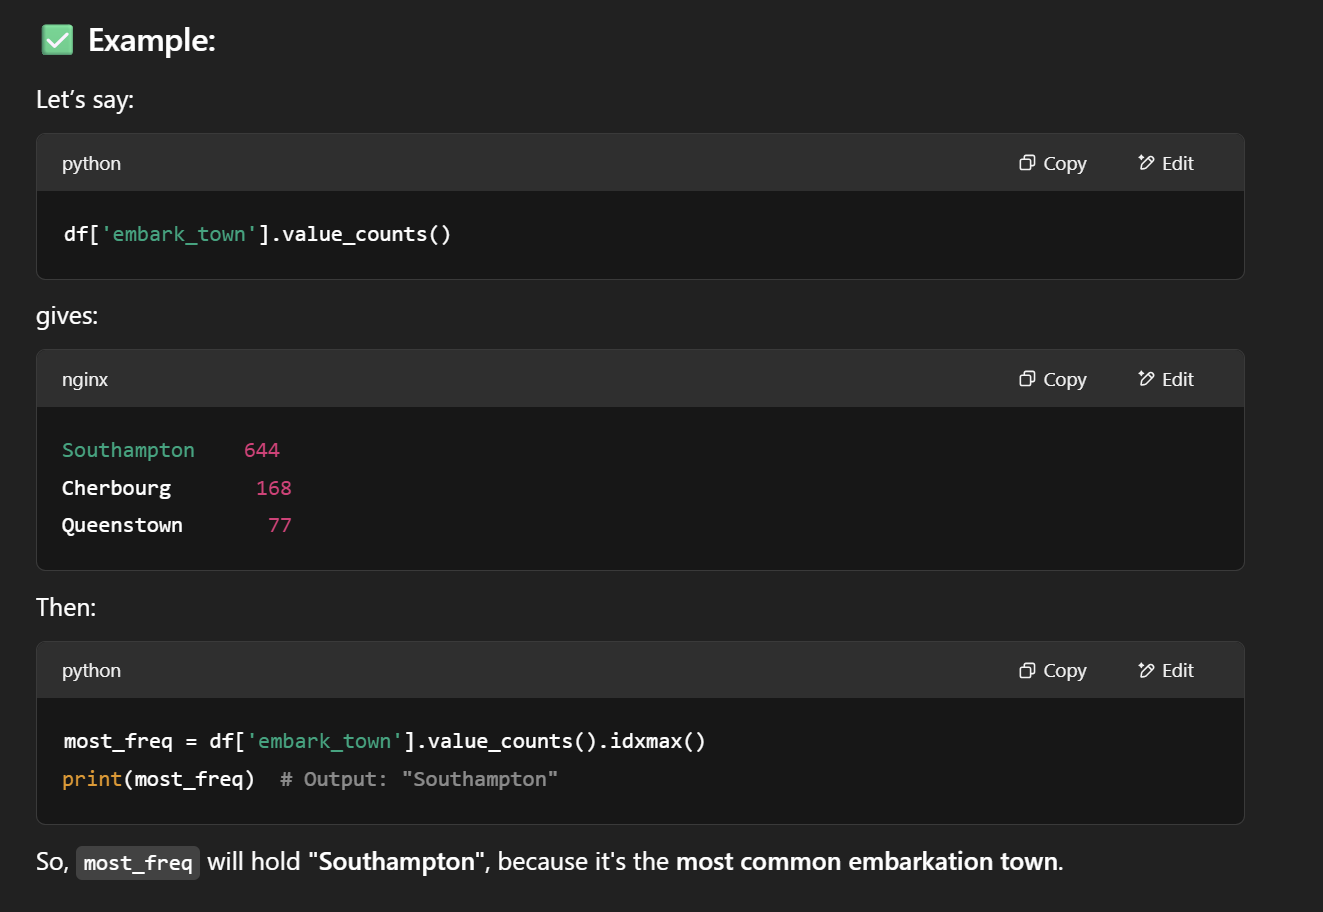

In [121]:
nan=df['embark_town'].isnull().value_counts(dropna=False)
nan

embark_town
False    889
True       2
Name: count, dtype: int64

In [122]:
df['embark_town'].fillna(msot_freq,inplace=True)


C:\Users\bened\AppData\Local\Temp\ipykernel_7824\3643091787.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embark_town'].fillna(msot_freq,inplace=True)


In [123]:
#every NaN is replaced with southampton

nan=df['embark_town'].isnull().value_counts(dropna=False)
nan

embark_town
False    891
Name: count, dtype: int64

In [124]:
df['embark_town'][825:830]

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829    Southampton
Name: embark_town, dtype: object

to change the value of NaN to the immediate preceding value of the row

In [125]:
df['embark_town'].fillna(method='ffill',inplace=True)


C:\Users\bened\AppData\Local\Temp\ipykernel_7824\3919240763.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embark_town'].fillna(method='ffill',inplace=True)
C:\Users\bened\AppData\Local\Temp\ipykernel_7824\3919240763.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['embark_town'].fillna(method='ffill',inplace=True)


In [126]:
df['embark_town'][825:830]

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829    Southampton
Name: embark_town, dtype: object